In [1]:
import pandas.io.sql as pd_sql
import psycopg2 as pg

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Connecting to database "ccdefault"
connection_args = {'host': '204.236.167.183',
                   'user': 'ubuntu',
                   'port': 5432, 
                   'database': 'ccdefault'
                  }

connection = pg.connect(**connection_args)
cursor = connection.cursor()

In [3]:
query = "SELECT * \
         FROM ccdefault \
         ;"

cursor.execute(query)
df = pd_sql.read_sql_query(query, connection)

In [4]:
df.columns

Index(['credit_line', 'sex', 'education', 'marriage', 'age', 'status_2005_04',
       'status_2005_05', 'status_2005_06', 'status_2005_07', 'status_2005_08',
       'status_2005_09', 'bill_2005_09', 'bill_2005_08', 'bill_2005_07',
       'bill_2005_06', 'bill_2005_05', 'bill_2005_04', 'payment_2005_09',
       'payment_2005_08', 'payment_2005_07', 'payment_2005_06',
       'payment_2005_05', 'payment_2005_04', 'default_payment_next_month'],
      dtype='object')

In [5]:
df.head(10)

,credit_line,sex,education,marriage,age,status_2005_04,status_2005_05,status_2005_06,status_2005_07,status_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

df2 = df[['education_Graduate School', 'education_High School', 'education_Others', 'education_University', 
    'age_Gen X', 'age_Millennials', 'age_Silent Gen', 'payment_was_delayed', 'status_delayed_sum']].head(10)

df2.style.set_properties(**{'text-align': 'center'})

,education_Graduate School,education_High School,education_Others,education_University,age_Gen X,age_Millennials,age_Silent Gen,payment_was_delayed,status_delayed_sum
0,0,0,0,1,0,1,0,1,2
1,0,0,0,1,1,0,0,1,2
2,0,0,0,1,1,0,0,0,0
3,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0
6,1,0,0,0,1,0,0,0,0
7,0,0,0,1,0,1,0,0,0
8,0,1,0,0,1,0,0,1,1
9,0,1,0,0,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   credit_line                 30000 non-null  int64
 1   sex                         30000 non-null  int64
 2   education                   30000 non-null  int64
 3   marriage                    30000 non-null  int64
 4   age                         30000 non-null  int64
 5   status_2005_04              30000 non-null  int64
 6   status_2005_05              30000 non-null  int64
 7   status_2005_06              30000 non-null  int64
 8   status_2005_07              30000 non-null  int64
 9   status_2005_08              30000 non-null  int64
 10  status_2005_09              30000 non-null  int64
 11  bill_2005_09                30000 non-null  int64
 12  bill_2005_08                30000 non-null  int64
 13  bill_2005_07                30000 non-null  int64
 14  bill_2

In [8]:
## Check to see unique values for each columns
# for column in df.columns:
#     print(column)
#     print(sorted(df[column].unique()))
#     print("-----")

In [9]:
df.replace({'education': {1: 'Graduate School', 
                          2: 'University', 
                          3: 'High School', 
                          4: 'Others', 
                          0: 'Unknown', 
                          5: 'Unknown', 
                          6: 'Unknown'}, 
             'sex': {1: 'Male', 
                     2: 'Female'},
             'marriage': {1: 'Married', 
                          2: 'Single', 
                          3: 'Others',
                          0: 'Unknown'}
           }, inplace=True
          )

In [10]:
# df['status_detail_04'] = df['status_2005_04'].apply(lambda x: repayment_status(x))
# df['status_detail_05'] = df['status_2005_05'].apply(lambda x: repayment_status(x))
# df['status_detail_06'] = df['status_2005_06'].apply(lambda x: repayment_status(x))
# df['status_detail_07'] = df['status_2005_07'].apply(lambda x: repayment_status(x))
# df['status_detail_08'] = df['status_2005_08'].apply(lambda x: repayment_status(x))
# df['status_detail_09'] = df['status_2005_09'].apply(lambda x: repayment_status(x))

In [11]:
df['cerdit_line_total_usage'] = (df['bill_2005_04'] + df['bill_2005_05'] + df['bill_2005_06']\
                               + df['bill_2005_07'] + df['bill_2005_08'] + df['bill_2005_09'])/(6*df['credit_line'])


In [12]:
df['status_delayed_04'] = df['status_2005_04'].apply(lambda x: 1 if x > 0 else 0)
df['status_delayed_05'] = df['status_2005_05'].apply(lambda x: 1 if x > 0 else 0)
df['status_delayed_06'] = df['status_2005_06'].apply(lambda x: 1 if x > 0 else 0)
df['status_delayed_07'] = df['status_2005_07'].apply(lambda x: 1 if x > 0 else 0)
df['status_delayed_08'] = df['status_2005_08'].apply(lambda x: 1 if x > 0 else 0)
df['status_delayed_09'] = df['status_2005_09'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
df['payment_was_delayed'] = np.where(
    (df['status_delayed_04'] == 1) | 
    (df['status_delayed_05'] == 1) |
    (df['status_delayed_06'] == 1) |
    (df['status_delayed_07'] == 1) |
    (df['status_delayed_08'] == 1) |
    (df['status_delayed_09'] == 1), int(1), 0)

In [14]:
df['status_delayed_sum'] = df['status_delayed_04'] + df['status_delayed_05'] + df['status_delayed_06'] + \
                           df['status_delayed_07'] + df['status_delayed_08'] + df['status_delayed_09']

In [15]:
df.rename(columns = {'default_payment_next_month': 'default'}, inplace=True)

In [16]:
education_dummy_df = pd.get_dummies(df['education'], prefix='education')
education_dummy_df

,education_Graduate School,education_High School,education_Others,education_University,education_Unknown
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
29995,0,1,0,0,0
29996,0,1,0,0,0
29997,0,0,0,1,0
29998,0,1,0,0,0


In [17]:
df = pd.concat([df, education_dummy_df], axis = 1 )
df.drop(['education_Unknown'], axis=1, inplace=True)

In [18]:
df['birth_year'] = 2005 - df['age']
df['birth_year']

0        1981
1        1979
2        1971
3        1968
4        1948
         ... 
29995    1966
29996    1962
29997    1968
29998    1964
29999    1959
Name: birth_year, Length: 30000, dtype: int64

In [19]:
def generation(birth_year):
    if birth_year >= 1995:
        return 'Gen Z'
    elif birth_year >= 1980 and birth_year <= 1994:
        return 'Millennials'
    elif birth_year >= 1965 and birth_year <= 1979:
        return 'Gen X'
    elif birth_year >= 1946 and birth_year <= 1964:
        return 'Baby Boomers'
    elif birth_year <= 1945:
        return 'Silent Gen'
    else:
        return np.nan

In [20]:
df['generation'] = df['birth_year'].apply(lambda x: generation(x))
df[['generation', 'birth_year', 'age']]

,generation,birth_year,age
0,Millennials,1981,24
1,Gen X,1979,26
2,Gen X,1971,34
3,Gen X,1968,37
4,Baby Boomers,1948,57
...,...,...,...
29995,Gen X,1966,39
29996,Baby Boomers,1962,43
29997,Gen X,1968,37
29998,Baby Boomers,1964,41


In [21]:
df['generation'].value_counts()

Gen X           17855
Baby Boomers     7935
Millennials      3871
Silent Gen        339
Name: generation, dtype: int64

In [22]:
generation_dummy_df = pd.get_dummies(df['generation'], prefix='age', drop_first=True)

In [23]:
df = pd.concat([df, generation_dummy_df], axis = 1 )

In [24]:
df.to_pickle('data.pkl')

In [25]:
# df['status_score'] = df['status_2005_04'] + df['status_2005_05'] + df['status_2005_06'] \
#                    + df['status_2005_07'] + df['status_2005_08'] + df['status_2005_09']

In [26]:
target_count = df.default.value_counts()
# print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count)*100, 4)}%')

Class 0: 23364
Class 1: 6636
Proportion: 3.52 : 1
Percentage of Majority Class: 77.88%


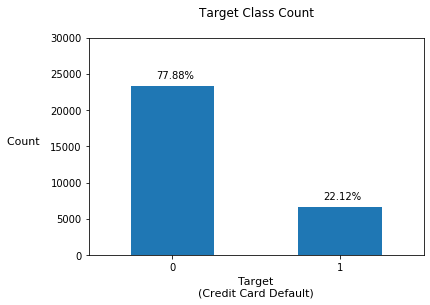

In [27]:
ax = target_count.plot(kind='bar', title='Target Class Count\n', rot=0)
ax.set_xlabel('Target\n(Credit Card Default)', size = 11)
ax.set_ylabel('Count             ', size = 11, rotation = 0)
ax.set_ylim(0, 30000)

values = [23364, 6636]

for index, value in enumerate(values):
    plt.text(index-0.1, value+1000, str(round(value/sum(values)*100, 4)) + "%");

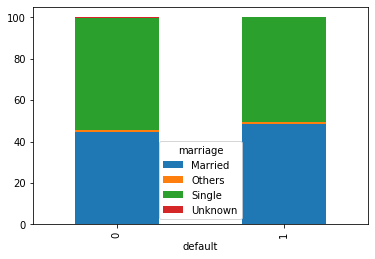

In [28]:
df.groupby(['default', 'marriage']).size()\
    .groupby(level=0).apply(lambda x: 100*x/x.sum())\
    .unstack().plot(kind='bar', stacked=True)

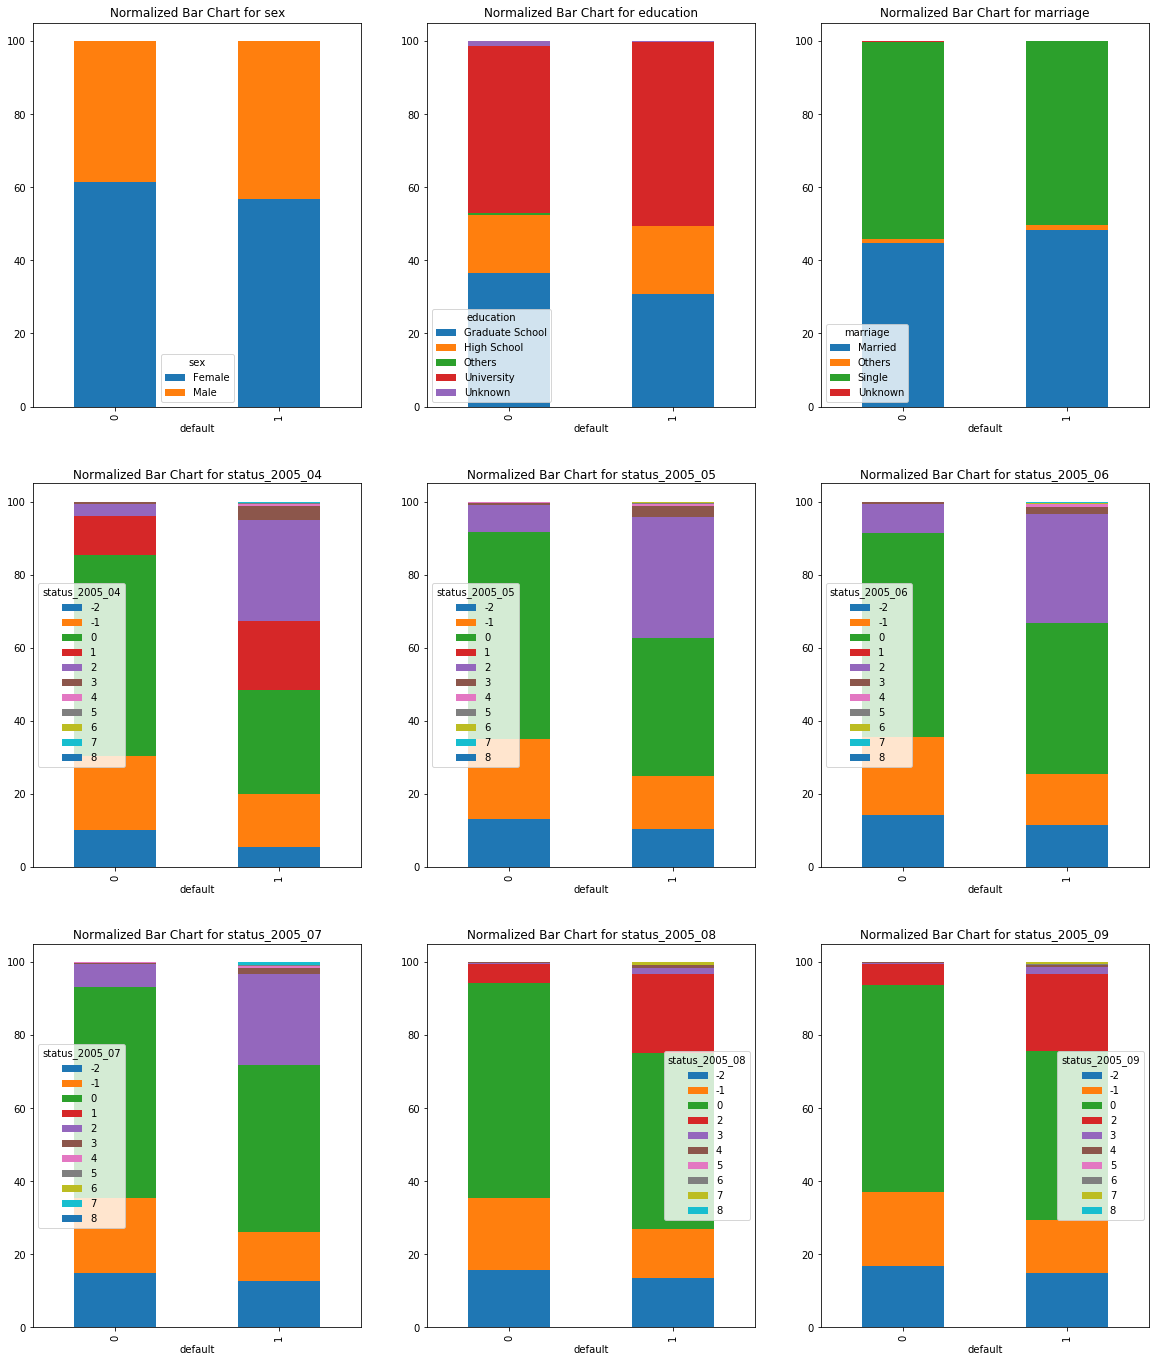

In [44]:
features = ['sex', 
            'education', 
            'marriage', 
            'status_2005_04',
            'status_2005_05', 
            'status_2005_06', 
            'status_2005_07', 
            'status_2005_08',
            'status_2005_09']

total_num_plots = len(features)
num_rows = int(total_num_plots/3)
num_cols = 3
subplots_width = num_rows*8
plot_num = 0


fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, subplots_width))


while plot_num < (len(features) - 1):
    for row_num in range(num_rows):
        for col_num in range(num_cols):
            if plot_num == len(features):
                break
            df.groupby(['default', features[plot_num]]).size()\
            .groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack()\
            .plot(kind='bar', 
                  stacked=True, 
                  ax=axes[row_num, col_num],
                  title="Normalized Bar Chart for " + features[plot_num])
            

            #plt.legend(loc='lower center')
            ;
            
            plot_num += 1
            


In [30]:
df.columns

Index(['credit_line', 'sex', 'education', 'marriage', 'age', 'status_2005_04',
       'status_2005_05', 'status_2005_06', 'status_2005_07', 'status_2005_08',
       'status_2005_09', 'bill_2005_09', 'bill_2005_08', 'bill_2005_07',
       'bill_2005_06', 'bill_2005_05', 'bill_2005_04', 'payment_2005_09',
       'payment_2005_08', 'payment_2005_07', 'payment_2005_06',
       'payment_2005_05', 'payment_2005_04', 'default',
       'cerdit_line_total_usage', 'status_delayed_04', 'status_delayed_05',
       'status_delayed_06', 'status_delayed_07', 'status_delayed_08',
       'status_delayed_09', 'payment_was_delayed', 'status_delayed_sum',
       'education_Graduate School', 'education_High School',
       'education_Others', 'education_University', 'birth_year', 'generation',
       'age_Gen X', 'age_Millennials', 'age_Silent Gen'],
      dtype='object')

In [31]:
# Include: 'education'
    
# Use: 'cerdit_line_total_usage'  (instead of: 'credit_line', 'bill_2005_09', 'bill_2005_08', 'bill_2005_07',
#                                              'bill_2005_06', 'bill_2005_05', 'bill_2005_04')
# Use: 'status_delayed_sum',  (instead of: 'status_2005_04', 'status_2005_05', 'status_2005_06', 'status_2005_07',
#                                        'status_2005_08','status_2005_09', 
#                                        'status_delayed_04','status_delayed_05', 'status_delayed_06', 
#                                        'status_delayed_07','status_delayed_08', 'status_delayed_09',) 

# Removing 'payment_was_delayed' as it's highly correlated with 'status_delayed_sum'
# Discriminatory: 'sex', 'marriage', 'age'
    
# Get rid of payment info as the info is kinda captured in payment status: 'payment_2005_09',
#        'payment_2005_08', 'payment_2005_07', 'payment_2005_06',
#        'payment_2005_05', 'payment_2005_04'

In [32]:
X = df[['education_Graduate School', 'education_University','education_High School','education_Others',
        'cerdit_line_total_usage', 
        'status_delayed_sum', 'payment_was_delayed',
        'age', 'age_Gen X', 'age_Millennials', 'age_Silent Gen']]

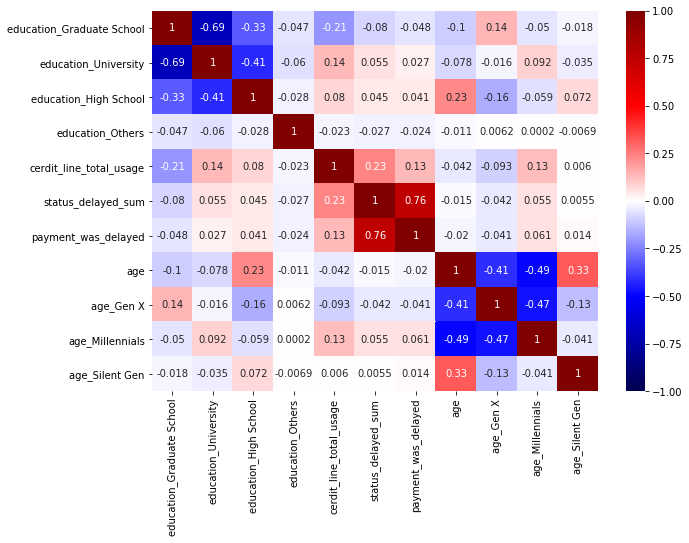

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [34]:
X = df[['education_Graduate School', 'education_University','education_High School','education_Others',
        'cerdit_line_total_usage', 
        'status_delayed_sum', # 'payment_was_delayed', --> correlated
        #'age', --> correlated
        'age_Gen X', 'age_Millennials', 'age_Silent Gen']]

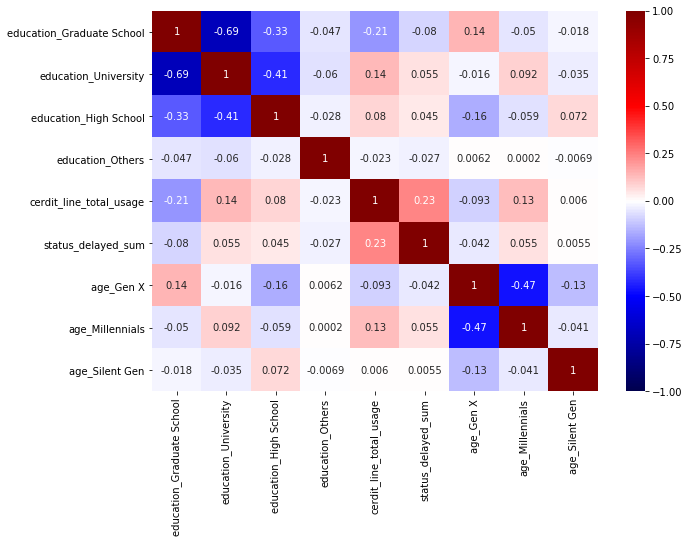

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

Text(0.5, 1, 'Correlation Heatmap for Model Features\n')

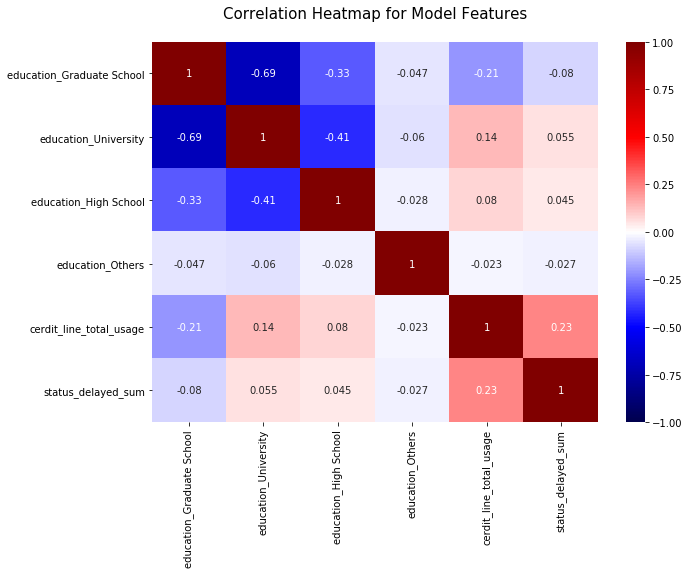

In [43]:
X = df[['education_Graduate School', 'education_University','education_High School','education_Others',
        'cerdit_line_total_usage', 
        'status_delayed_sum']] # 'payment_was_delayed', --> correlated
        #'age', --> correlated
        #'age_Gen X', 'age_Millennials', 'age_Silent Gen'
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Model Features\n", size=15)

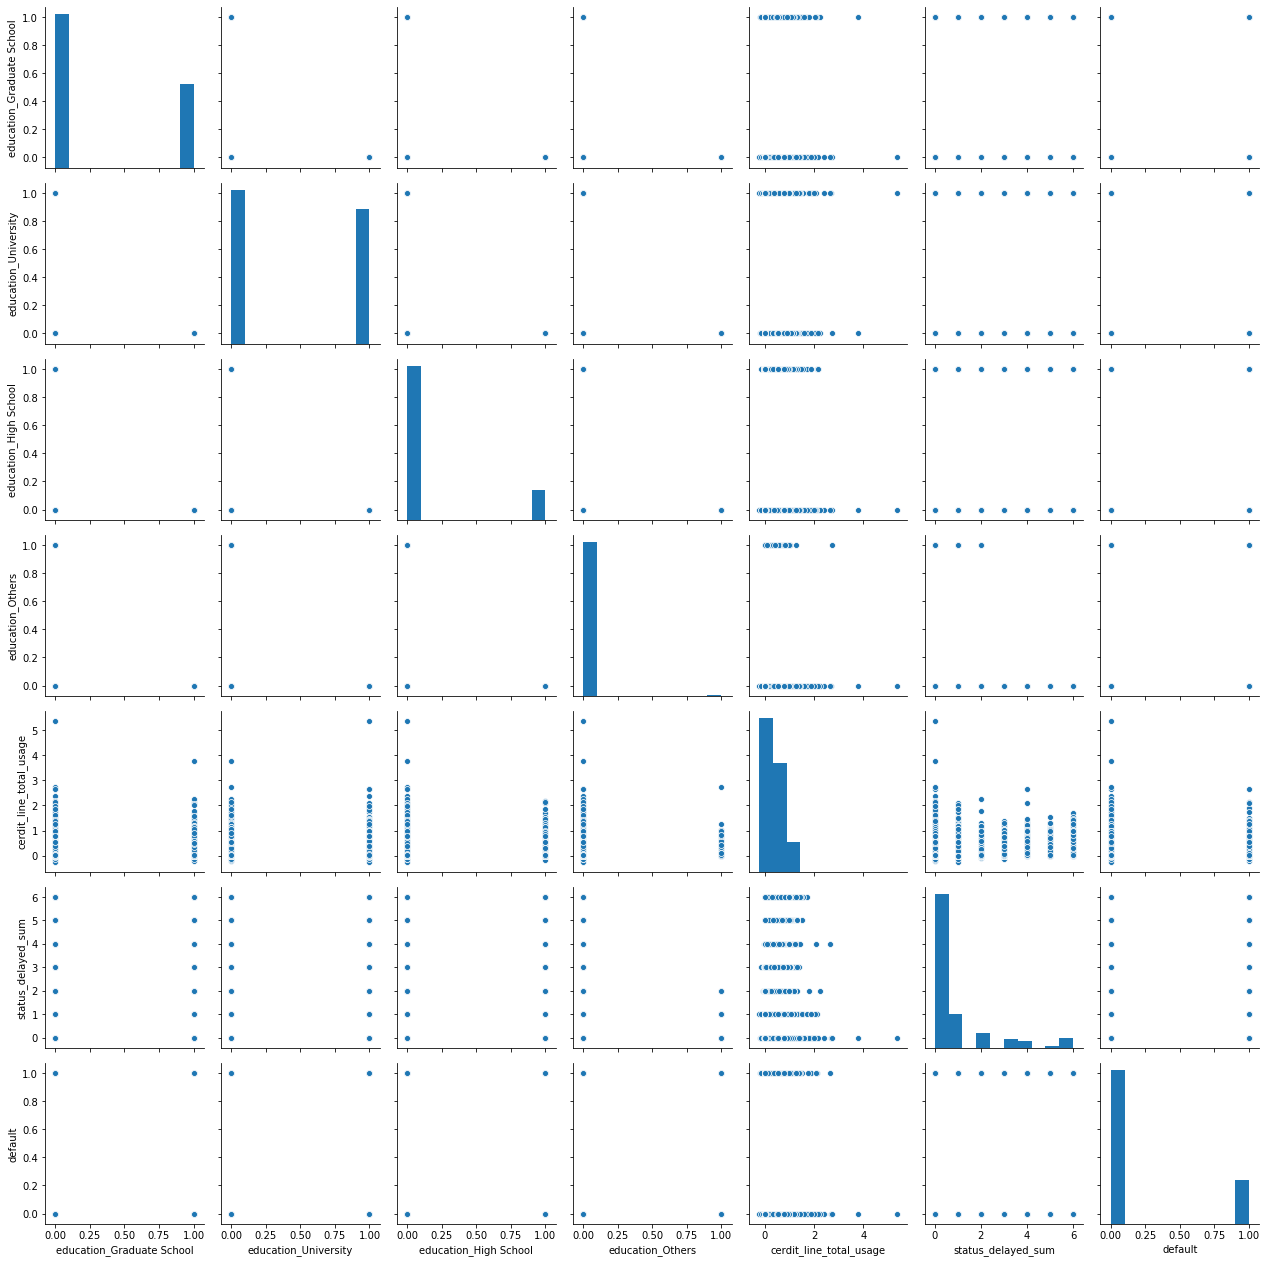

In [57]:
sns.pairplot(df[['education_Graduate School', 'education_University','education_High School','education_Others',
        'cerdit_line_total_usage', 
        'status_delayed_sum', 'default']])